In [1]:
# Import general useful packages
import numpy as np
import pandas as pd

# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scikitplot as skplt

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Import other useful subpackage
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#Loadning data
data = pd.read_csv('D:\\Rajib Documents\\MEGAsync\\Kolabtree\\Fraud_Detection-Roni\\data.csv')

In [3]:
#data structure
data.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f62,f63,f64,f65,f66,f67,f68,f69,date_time,class
0,true,False,No,1,False,1,False,1,type_A,False,...,0,0,1,false,False,not_valid,1,160.0,2017-04-18T09:17:44.231,0
1,true,False,No,1,False,1,False,1,type_A,False,...,0,0,1,false,False,not_valid,1,159.0,2017-04-08T05:56:06.599,0
2,no_data,False,Yes,1,True,1,False,1,type_A,False,...,0,0,1,false,True,not_valid,1,118.0,2017-05-02T16:28:43.207,0
3,false,False,Yes,1,True,1,False,1,type_A,False,...,0,0,1,false,False,not_valid,1,155.0,2017-05-17T06:48:45.574,0
4,true,False,Yes,1,True,1,False,1,type_A,False,...,0,0,1,false,True,not_valid,1,125.0,2017-05-09T18:53:05.890,0


0    4500
1     500
Name: class, dtype: int64


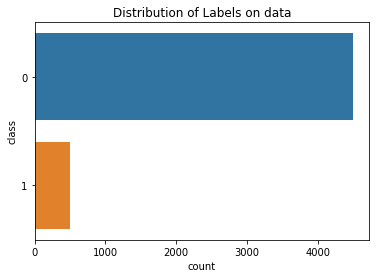

In [7]:
#Distribution of Labels on train data
ax = sns.countplot(y=data['class'])
xx=data['class'].value_counts()
print(xx)
ax.set_title('Distribution of Labels on data')
plt.show()

In [8]:
# For training data
print("Data: {}".format(data.shape))
print("Null values present in data: {}".format(data.isnull().values.any()))

Data: (5000, 71)
Null values present in data: False


In [9]:
# Univariate Analysis
data.describe()

,f4,f6,f8,f18,f20,f21,f23,f25,f26,f27,...,f48,f52,f55,f58,f62,f63,f64,f68,f69,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1.243600,1.155400,1.754200,1.074800,1.272000,548.471622,8.411000,1.101400,1.319600,1.249600,...,1296.837268,0.814454,1.058000,943.182078,1.774800,0.009200,0.689600,1.148200,1678.807733,0.10000
std,1.080228,0.767964,1.925753,0.336493,0.631265,888.582893,21.468457,0.666038,0.912153,4.793819,...,3389.653210,0.299089,5.017138,2683.703254,4.483225,0.101575,1.057864,1.782041,3234.937085,0.30003
min,1.000000,0.000000,1.000000,1.000000,1.000000,38.000000,0.100000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.00000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,109.965000,0.160000,1.000000,1.000000,1.000000,...,0.000000,0.570000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,145.500000,0.00000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,184.995000,0.460000,1.000000,1.000000,1.000000,...,55.920000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,488.200000,0.00000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,550.000000,2.770000,1.000000,1.000000,1.000000,...,963.805000,1.000000,1.000000,584.867500,2.000000,0.000000,1.000000,1.000000,1682.877500,0.00000
max,47.000000,36.000000,69.000000,5.000000,12.000000,5550.000000,99.000000,29.000000,19.000000,239.000000,...,50880.880000,1.000000,103.000000,46388.810000,66.000000,2.000000,24.000000,69.000000,48241.310000,1.00000


In [10]:
# Get X and y for training data
y = data['class']
X = data.drop(columns = ['class','date_time'])

In [13]:
# Categorical boolean mask
bool_feature = X.dtypes==bool # filter bool_feature columns using mask and turn it into a list
#print(bool_feature)
bool_cols = X.columns[bool_feature].tolist()
print(bool_cols)

['f2', 'f5', 'f7', 'f10', 'f11', 'f12', 'f15', 'f16', 'f19', 'f28', 'f29', 'f31', 'f34', 'f35', 'f37', 'f40', 'f42', 'f46', 'f50', 'f51', 'f54', 'f56', 'f60', 'f61', 'f66']


In [14]:
# convert bool_feature in 0 and 1
X[bool_cols] *= 1

In [15]:
##Change no_data value to 0
X['f13'] = X['f13'].apply(lambda x: np.nan if x=="no_data" else x)
X['f14'] = X['f14'].apply(lambda x: np.nan if x=="no_data" else x)
X['f36'] = X['f36'].apply(lambda x: np.nan if x=="no_data" else x)

X = X.replace(np.nan, 0)
X['f13'] = X['f13'].astype('int64')
X['f14'] = X['f14'].astype('int64')
X['f36'] = X['f36'].astype('int64')

In [16]:
# Categorical boolean mask
categorical_feature = X.dtypes==object# filter categorical columns using mask and turn it into a list
#print(categorical_feature)
categorical_cols = X.columns[categorical_feature].tolist()
print(categorical_cols)

['f1', 'f3', 'f9', 'f17', 'f22', 'f24', 'f32', 'f33', 'f38', 'f39', 'f41', 'f43', 'f44', 'f45', 'f49', 'f53', 'f57', 'f59', 'f65', 'f67']


In [17]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder # instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: 
                                     le.fit_transform(col))
X[categorical_cols].head(5)

,f1,f3,f9,f17,f22,f24,f32,f33,f38,f39,f41,f43,f44,f45,f49,f53,f57,f59,f65,f67
0,2,0,0,0,3,0,0,0,0,3,0,3,0,0,0,1,0,1,0,1
1,2,0,0,0,2,0,0,0,0,3,0,3,0,0,0,1,0,1,0,1
2,1,1,0,0,3,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,3,0,0,0,2,2,0,2,0,0,0,0,0,1,0,1
4,2,1,0,1,3,0,0,0,0,2,0,0,0,0,0,1,0,1,0,1


In [45]:
# Spliting data (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [46]:
#Distribution of Labels on train data
xy=y_train.value_counts()
print(xy)

0    3590
1     410
Name: class, dtype: int64


In [25]:
# Applying various Classification algorithms without doing variable reductions
accuracy_scores = np.zeros(6)

# Support Vector Classifier
clf = SVC(class_weight = 'balanced').fit(X_train, y_train)
prediction1 = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
prediction2 = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier(                                   ).fit(X_train, y_train)
prediction3 = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier(class_weight = 'balanced').fit(X_train, y_train)
prediction4 = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Gradient Boosting
clf = GradientBoostingClassifier().fit(X_train, y_train)
prediction5 = clf.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction5)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[4]))

#XGBoosting
xgb_model = xgb.XGBClassifier(scale_pos_weight = 9.06) # 3590/480 = 9.06
xgb_model.fit(X_train, y_train)
prediction6 = xgb_model.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction6)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[5]))

C:\Users\datacore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 90.9%


C:\Users\datacore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression accuracy: 90.60000000000001%
K Nearest Neighbors Classifier accuracy: 90.7%


C:\Users\datacore\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier accuracy: 96.1%
Gradient Boosting Classifier accuracy: 97.89999999999999%
XGBoost Classifier accuracy: 93.89999999999999%


Text(0.5, 1.0, 'Accuracy of various algorithms')

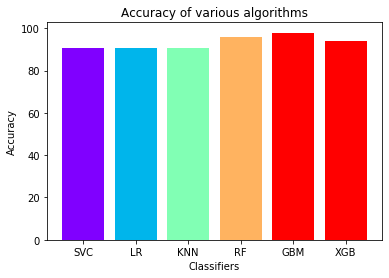

In [26]:
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'KNN', 'RF', 'GBM', 'XGB']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

In [27]:
# Confusion Matrix for above all models
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test, prediction1)
print(conf1)
conf2 = confusion_matrix(y_test, prediction2)
print(conf2)
conf3 = confusion_matrix(y_test, prediction3)
print(conf3)
conf4 = confusion_matrix(y_test, prediction4)
print(conf4)
conf5 = confusion_matrix(y_test, prediction5)
print(conf5)
conf6 = confusion_matrix(y_test, prediction6)
print(conf6)

[[907   3]
 [ 88   2]]
[[829  81]
 [ 13  77]]
[[885  25]
 [ 68  22]]
[[908   2]
 [ 37  53]]
[[908   2]
 [ 19  71]]
[[860  50]
 [ 11  79]]


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       910
           1       0.61      0.88      0.72        90

    accuracy                           0.94      1000
   macro avg       0.80      0.91      0.84      1000
weighted avg       0.95      0.94      0.94      1000



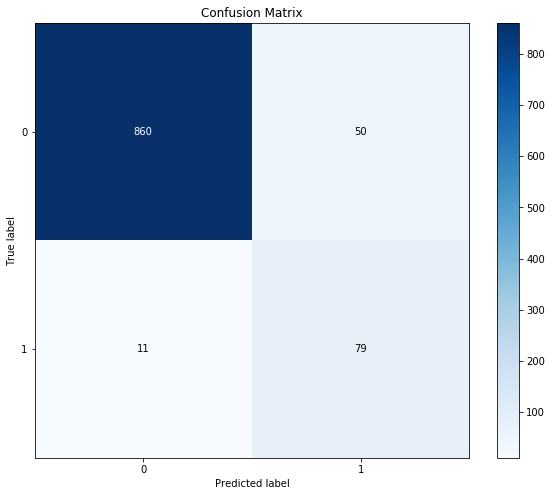

In [24]:
# check validation statistics (Classification Summary)
print(classification_report(y_test, prediction6)) # from confusion matrix XGBoost perform well without variable reduction
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, prediction6, figsize=(10, 8))
plt.show()


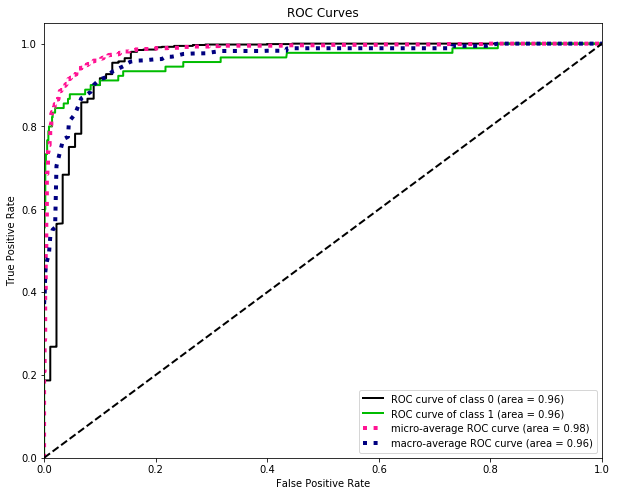

In [28]:
# ROC Curves
y_probas = xgb_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

In [29]:
#With Reduction technique - First

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(X)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train = pca.fit_transform(train)
print(train.shape)

(5000, 37)


In [30]:
#With Reduction technique - Second

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train1 = slc.fit_transform(train)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train1 = pca.fit_transform(train1)
print(train1.shape)

(5000, 34)


In [31]:
#With Reduction technique - Third

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train2 = slc.fit_transform(train1)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train2 = pca.fit_transform(train2)
print(train2.shape)

(5000, 31)


In [32]:
#With Reduction technique - Fourth

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train3 = slc.fit_transform(train2)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train3 = pca.fit_transform(train3)
print(train3.shape)

(5000, 28)


In [33]:
#With Reduction technique - Fifth

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train4 = slc.fit_transform(train3)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train4 = pca.fit_transform(train4)
print(train4.shape)

(5000, 26)


In [34]:
#With Reduction technique - Sixth

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train5 = slc.fit_transform(train4)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train5 = pca.fit_transform(train5)
print(train5.shape)

(5000, 24)


In [35]:
#With Reduction technique - Seventh

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train6 = slc.fit_transform(train5)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train6 = pca.fit_transform(train6)
print(train6.shape)

(5000, 22)


In [36]:
#With Reduction technique - Eightth

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train7 = slc.fit_transform(train6)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train7 = pca.fit_transform(train7)
print(train7.shape)

(5000, 20)


In [37]:
#With Reduction technique - Nineth

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train8 = slc.fit_transform(train7)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train8 = pca.fit_transform(train8)
print(train8.shape)

(5000, 18)


In [38]:
#With Reduction technique - Tenth

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train9 = slc.fit_transform(train8)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train9 = pca.fit_transform(train9)
print(train9.shape)

(5000, 17)


In [39]:
#With Reduction technique - Eleventh

# Statndard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train10 = slc.fit_transform(train9)

# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, random_state = 0)
train10 = pca.fit_transform(train10)
print(train10.shape)

(5000, 16)


In [48]:
# Spliting Data form above reduction dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train10, y, test_size = 0.3, random_state = 3)

In [49]:
#Distribution of Labels on train data
yy=y_train.value_counts()
print(yy)

0    3152
1     348
Name: class, dtype: int64


In [50]:
# Applying various Classification algorithms without doing variable reductions
accuracy_scores = np.zeros(6)

# Support Vector Classifier
clf = SVC(class_weight = 'balanced').fit(X_train, y_train)
prediction1 = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction1)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
prediction2 = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction2)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction3 = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction3)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier(class_weight = 'balanced').fit(X_train, y_train)
prediction4 = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction4)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

# Gradient Boosting
clf = GradientBoostingClassifier().fit(X_train, y_train)
prediction5 = clf.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction5)*100
print('Gradient Boosting Classifier accuracy: {}%'.format(accuracy_scores[4]))

#XGBoosting
xgb_model = xgb.XGBClassifier(scale_pos_weight = 9.06)
xgb_model.fit(X_train, y_train)
prediction6 = xgb_model.predict(X_test)
accuracy_scores[5] = accuracy_score(y_test, prediction6)*100
print('XGBoost Classifier accuracy: {}%'.format(accuracy_scores[5]))

C:\Users\datacore\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 94.0%
Logistic Regression accuracy: 76.46666666666667%


C:\Users\datacore\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


K Nearest Neighbors Classifier accuracy: 93.73333333333333%


C:\Users\datacore\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier accuracy: 92.93333333333334%
Gradient Boosting Classifier accuracy: 93.93333333333334%
XGBoost Classifier accuracy: 91.60000000000001%


Text(0.5, 1.0, 'Accuracy of various algorithms')

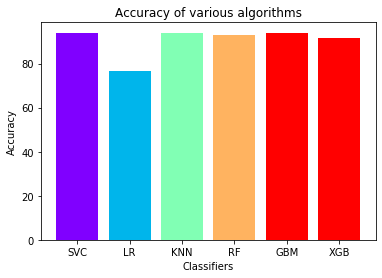

In [51]:
colors = cm.rainbow(np.linspace(0, 2, 9))
labels = ['SVC', 'LR', 'KNN', 'RF', 'GBM', 'XGB']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test, prediction1)
print(conf1)
conf2 = confusion_matrix(y_test, prediction2)
print(conf2)
conf3 = confusion_matrix(y_test, prediction3)
print(conf3)
conf4 = confusion_matrix(y_test, prediction4)
print(conf4)
conf5 = confusion_matrix(y_test, prediction5)
print(conf5)
conf6 = confusion_matrix(y_test, prediction6)
print(conf6)

[[1286   62]
 [  28  124]]
[[1045  303]
 [  50  102]]
[[1340    8]
 [  86   66]]
[[1346    2]
 [ 104   48]]
[[1335   13]
 [  78   74]]
[[1256   92]
 [  34  118]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1348
           1       0.56      0.78      0.65       152

    accuracy                           0.92      1500
   macro avg       0.77      0.85      0.80      1500
weighted avg       0.93      0.92      0.92      1500



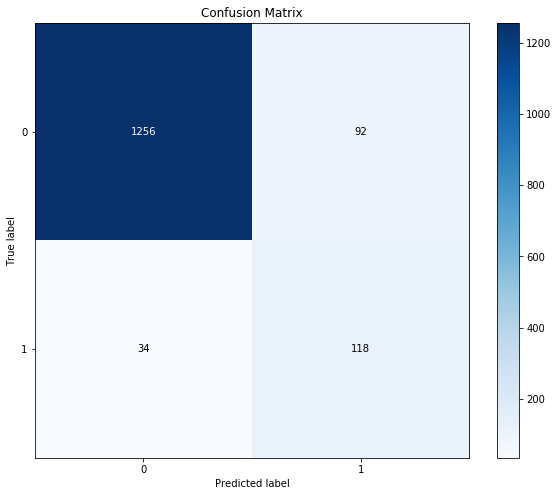

In [53]:
# check validation statistics (Classification Summary)
print(classification_report(y_test, prediction6)) # from confusion matrix SVC perform well with variable reduction
# Plot confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, prediction6, figsize=(10, 8))
plt.show()

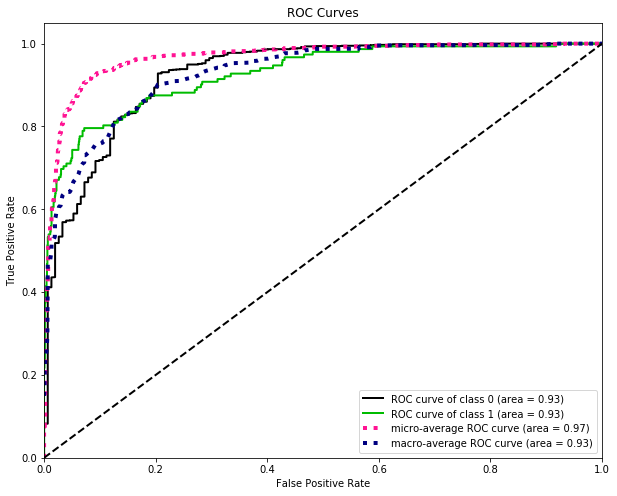

In [54]:
# ROC Curves
y_probas = xgb_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()